In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
df = pd.read_excel('waiter_tip.xlsx')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,13.45,2.11,Male,Yes,Sat,Lunch,3
1,11.56,3.20,Male,No,Sun,Dinner,4
2,9.65,3.50,Male,No,Thur,Lunch,1
3,20.36,4.20,Male,Yes,Fri,Lunch,5
4,31.20,1.56,Female,No,Fri,Dinner,3


In [3]:
df.isnull().sum()

total_bill    0
tip           3
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [4]:
df.dropna(inplace = True)
print(df.isnull().sum())
print(df.shape)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
(2058, 7)


In [5]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

# Unsupervised Model


### K-Means Clustering

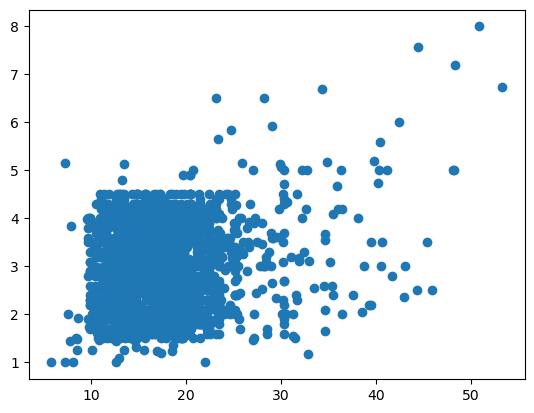

In [6]:
plt.scatter(df['total_bill'],df['tip'])

In [7]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [77]:
y_predicted = km.fit_predict(df[['total_bill','tip']])
y_predicted

array([1, 8, 6, ..., 7, 7, 1])

In [9]:
df['cluster']=y_predicted
df.head()

,total_bill,tip,sex,smoker,day,time,size,cluster
0,13.45,2.11,Male,Yes,Sat,Lunch,3,1
1,11.56,3.20,Male,No,Sun,Dinner,4,1
2,9.65,3.50,Male,No,Thur,Lunch,1,1
3,20.36,4.20,Male,Yes,Fri,Lunch,5,0
4,31.20,1.56,Female,No,Fri,Dinner,3,2


In [10]:
km.cluster_centers_

array([[20.23208381,  2.93087203],
       [13.84487782,  2.82173872],
       [33.77495495,  3.52913514]])

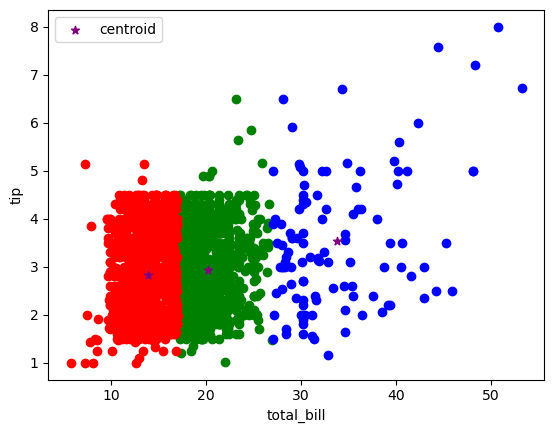

In [11]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.total_bill,df1['tip'],color='green')
plt.scatter(df2.total_bill,df2['tip'],color='red')
plt.scatter(df3.total_bill,df3['tip'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('total_bill')
plt.ylabel('tip')
plt.legend()

Preprocessing using min max scaler

In [12]:
scaler = MinMaxScaler()
scaler.fit(df[['tip']])
df['tip']=scaler.transform(df[['tip']])

scaler.fit(df[['total_bill']])
df['total_bill']=scaler.transform(df[['total_bill']])

In [13]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,cluster
0,0.162037,0.158571,Male,Yes,Sat,Lunch,3,1
1,0.122264,0.314286,Male,No,Sun,Dinner,4,1
2,0.082071,0.357143,Male,No,Thur,Lunch,1,1
3,0.307449,0.457143,Male,Yes,Fri,Lunch,5,0
4,0.535564,0.080000,Female,No,Fri,Dinner,3,2


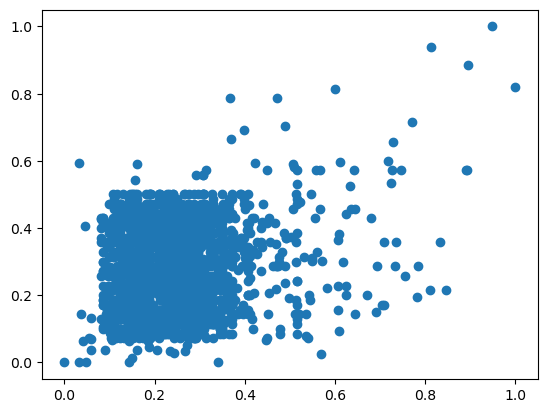

In [14]:
plt.scatter(df.total_bill,df['tip'])

In [15]:
km = KMeans(n_clusters = 3)
y_predicted= km.fit_predict(df[['total_bill', 'tip']])

In [16]:
y_predicted

array([0, 1, 1, ..., 2, 2, 0])

In [17]:
df['cluster']=y_predicted
df.head()

,total_bill,tip,sex,smoker,day,time,size,cluster
0,0.162037,0.158571,Male,Yes,Sat,Lunch,3,0
1,0.122264,0.314286,Male,No,Sun,Dinner,4,1
2,0.082071,0.357143,Male,No,Thur,Lunch,1,1
3,0.307449,0.457143,Male,Yes,Fri,Lunch,5,1
4,0.535564,0.080000,Female,No,Fri,Dinner,3,2


In [18]:
km.cluster_centers_

array([[0.22577517, 0.16937279],
       [0.23084118, 0.39188383],
       [0.54346392, 0.37051544]])

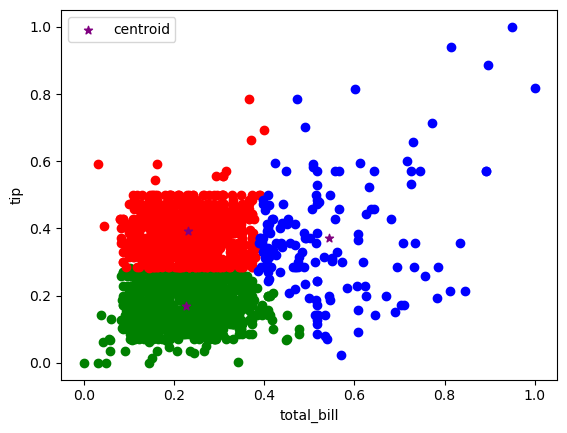

In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.total_bill,df1['tip'],color='green')
plt.scatter(df2.total_bill,df2['tip'],color='red')
plt.scatter(df3.total_bill,df3['tip'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('total_bill')
plt.ylabel('tip')
plt.legend()

Elbow Plot

In [20]:
from sklearn.metrics import silhouette_score
sse =[]
silhouette_scores = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['total_bill','tip']])
    sse.append(km.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(df[['total_bill', 'tip']], km.labels_))

In [21]:
km.inertia_

9.44142643864581

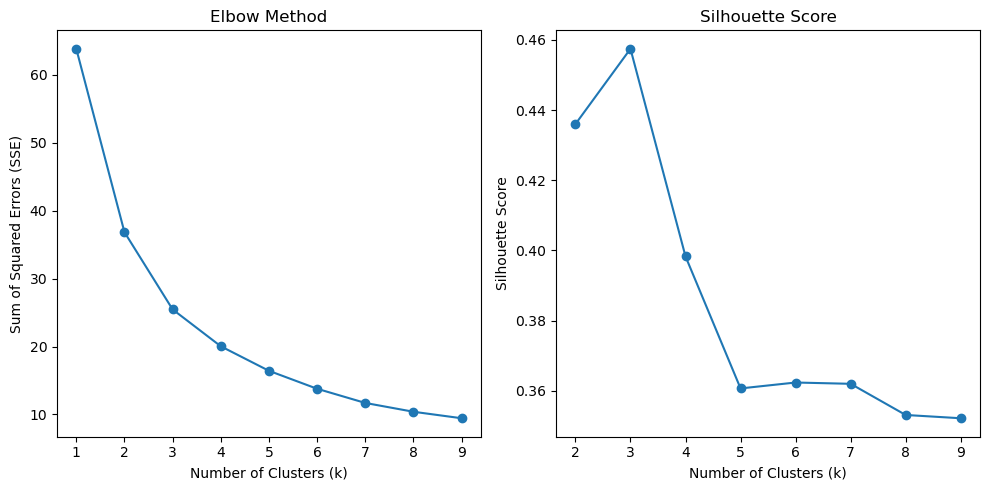

In [22]:
import numpy as np
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(np.arange(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

sse = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['total_bill', 'tip']])
    sse.append(km.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(df[['total_bill', 'tip']], km.labels_))

# Printing SSE for different k values
print("SSE for different k values:")
for k, sse_val in zip(k_range, sse):
    print(f"k={k}: SSE={sse_val}")

# Printing Silhouette Scores for different k values
print("\nSilhouette Scores for different k values:")
for k, silhouette_val in zip(range(2, len(silhouette_scores) + 2), silhouette_scores):
    print(f"k={k}: Silhouette Score={silhouette_val}")


SSE for different k values:
k=2: SSE=36.845927406102106
k=3: SSE=25.46760303139983
k=4: SSE=20.040609474875083
k=5: SSE=16.427632203551283
k=6: SSE=13.783049319657978
k=7: SSE=11.695965367587657
k=8: SSE=10.3963632102801
k=9: SSE=9.453112435150212

Silhouette Scores for different k values:
k=2: Silhouette Score=0.4360033018916136
k=3: Silhouette Score=0.45747217773429816
k=4: Silhouette Score=0.3983028644121282
k=5: Silhouette Score=0.36066816463466567
k=6: Silhouette Score=0.36247859178748415
k=7: Silhouette Score=0.361719103551935
k=8: Silhouette Score=0.3534187614375905
k=9: Silhouette Score=0.3465617806647501


In [24]:

from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
import pandas as pd


# Define the parameter grid to search through
param_grid = {
    'n_clusters': [2, 3],  # Values to test for the number of clusters
    'init': ['k-means++', 'random'],  # Methods for centroid initialization
    # Add more hyperparameters and their respective values to explore
}

# Create a KMeans instance
kmeans = KMeans()

# Grid Search
grid_search = GridSearchCV(kmeans, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(df[['total_bill', 'tip']])  # Assuming 'total_bill' and 'tip' are columns in your dataset

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Using the best model for clustering
best_kmeans = grid_search.best_estimator_
# Fit the best model to your data
best_kmeans.fit(df[['total_bill', 'tip']])
# Perform clustering/predictions
cluster_predictions = best_kmeans.predict(df[['total_bill', 'tip']])

Best Parameters: {'init': 'k-means++', 'n_clusters': 3}


# Probabilistic Model

#### Gausian Process

Mean Squared Error (MSE): 0.11
Root Mean Squared Error (RMSE): 0.33
Mean Absolute Error (MAE): 0.28


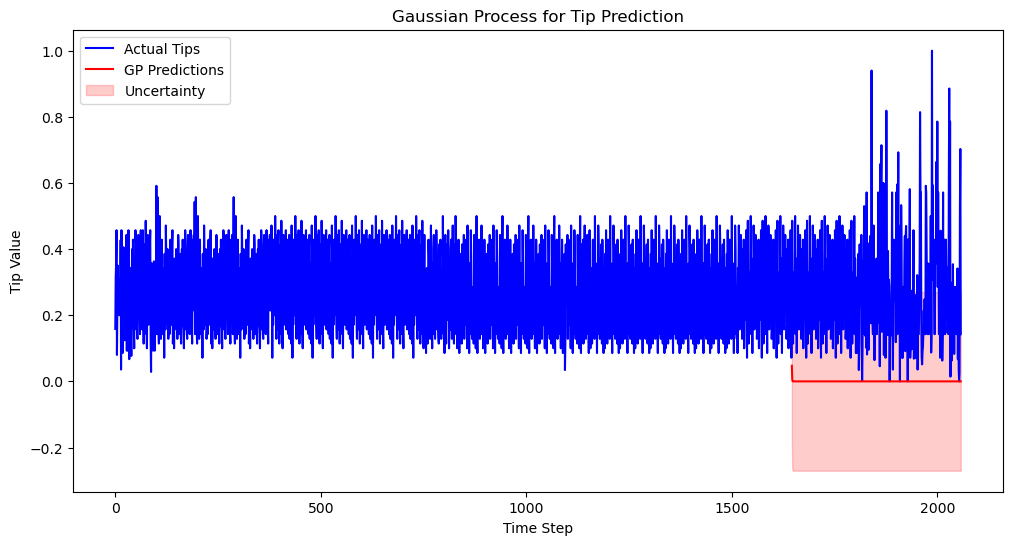

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'tip' column is present in the 'df' DataFrame
# Consider 'tip' for prediction
data = df['tip'].values.reshape(-1, 1)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Define and fit Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
gp_model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data)

# Predictions
test_indices = np.arange(len(train_data), len(data)).reshape(-1, 1)
predictions, std_dev = gp_model.predict(test_indices, return_std=True)

# Calculate evaluation metrics
mse = mean_squared_error(data[len(train_data):], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(data[len(train_data):], predictions)

# Print metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual Tips', color='blue')
plt.plot(np.arange(len(train_data), len(data)), predictions, label='GP Predictions', color='red')
plt.fill_between(np.arange(len(train_data), len(data)), predictions - std_dev, predictions + std_dev, color='red', alpha=0.2, label='Uncertainty')
plt.title('Gaussian Process for Tip Prediction')
plt.xlabel('Time Step')
plt.ylabel('Tip Value')
plt.legend()
plt.show()


#### Bayesian Networks

Mean Squared Error (MSE): 1.59
Root Mean Squared Error (RMSE): 1.26
Mean Absolute Error (MAE): 1.01


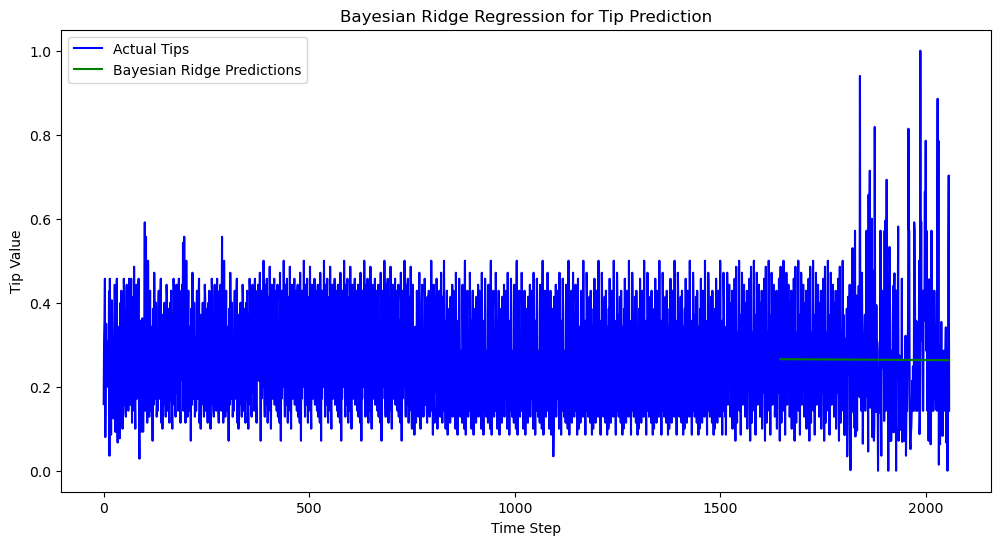

In [69]:
from sklearn.linear_model import BayesianRidge

# Reshape data
data = df['tip'].values.reshape(-1, 1)

# Normalize data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Define features and target
X_train, y_train = np.arange(len(train_data)).reshape(-1, 1), train_data.reshape(-1)
X_test = np.arange(len(train_data), len(data_normalized)).reshape(-1, 1)

# Initialize and fit Bayesian Ridge Regression model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)

# Predictions
predictions = bayesian_ridge.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(data_normalized[len(train_data):], scaler.inverse_transform(predictions.reshape(-1, 1)))
rmse = np.sqrt(mse)
mae = mean_absolute_error(data_normalized[len(train_data):], scaler.inverse_transform(predictions.reshape(-1, 1)))

# Print metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual Tips', color='blue')
plt.plot(np.arange(len(train_data), len(data)), scaler.inverse_transform(predictions.reshape(-1, 1)), label='Bayesian Ridge Predictions', color='green')
plt.title('Bayesian Ridge Regression for Tip Prediction')
plt.xlabel('Time Step')
plt.ylabel('Tip Value')
plt.legend()
plt.show()


#### Bayesian Loss Curve

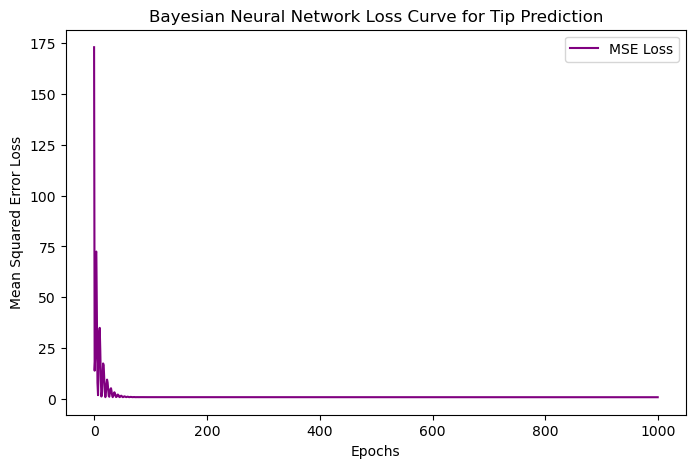

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Consider 'tip' for prediction
data = df['tip'].values.reshape(-1, 1)

# Normalize data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Convert data to PyTorch tensors
X_train, y_train = torch.arange(len(train_data)).float().unsqueeze(1), torch.tensor(train_data).float()
X_test, y_test = torch.arange(len(train_data), len(data_normalized)).float().unsqueeze(1), torch.tensor(test_data).float()

# Define Bayesian Neural Network model
class BNN(nn.Module):
    def __init__(self):
        super(BNN, self).__init__()
        self.fc = nn.Linear(1, 1)
        self.softplus = nn.Softplus()

    def forward(self, x):
        return self.fc(x)

# Initialize BNN model and set optimizer
bnn_model = BNN()
optimizer = optim.Adam(bnn_model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Training loop with loss curve
num_epochs = 1000  # Set the number of epochs here
loss_curve = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = bnn_model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    loss_curve.append(loss.item())

# Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(loss_curve, label='MSE Loss', color='purple')
plt.title('Bayesian Neural Network Loss Curve for Tip Prediction')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


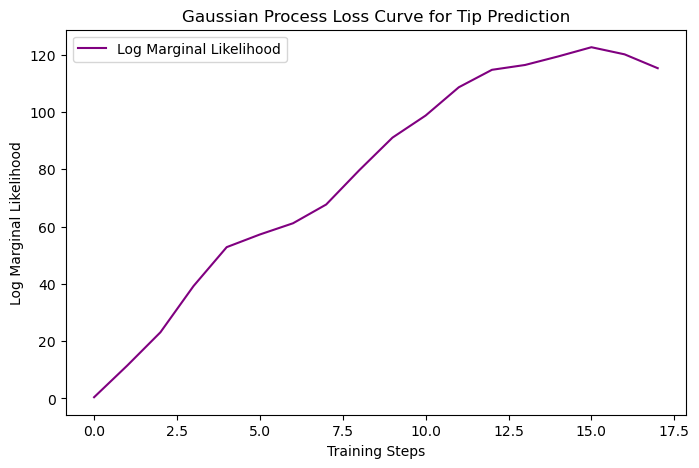

In [32]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import matplotlib.pyplot as plt

# Consider 'tip' for prediction
data = df['tip'].values.reshape(-1, 1)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Define and fit Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)

# Loss curve
loss_curve = []

# Rolling window size
window_size = 100

for i in range(len(train_data)):
    if i % window_size == 0 or i == len(train_data) - 1:
        gp_model.fit(np.arange(i + 1).reshape(-1, 1), train_data[:i + 1])
        loss_curve.append(gp_model.log_marginal_likelihood())

# Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(loss_curve, label='Log Marginal Likelihood', color='purple')
plt.title('Gaussian Process Loss Curve for Tip Prediction')
plt.xlabel('Training Steps')
plt.ylabel('Log Marginal Likelihood')
plt.legend()
plt.show()


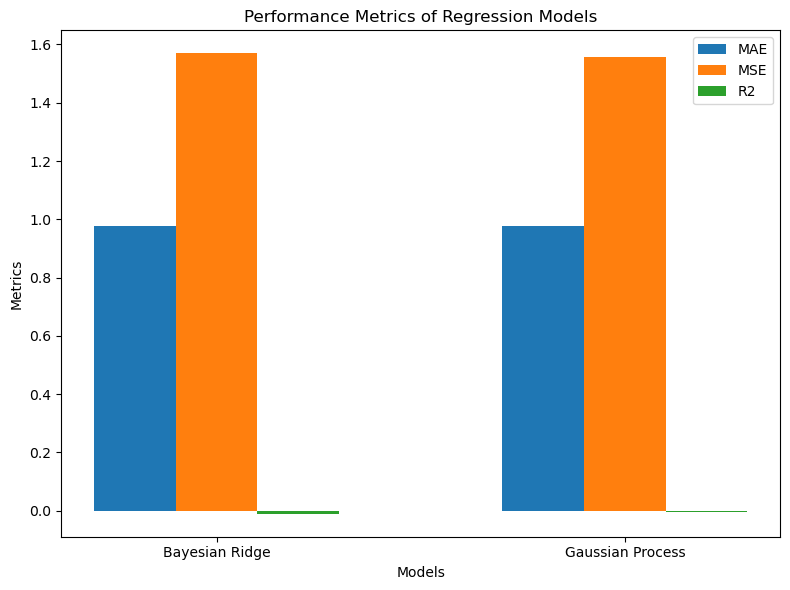

Best MAE: 0.9755120491113338 by Gaussian Process
Best MSE: 1.5580372496676105 by Gaussian Process
Best R2 : -0.002656401047450796 by Gaussian Process


In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import BayesianRidge

# Initialize Bayesian Ridge and Gaussian Process Regression
bayesian_ridge = BayesianRidge()
gaussian_process = GaussianProcessRegressor()

# Initialize models
models = [
    ('Bayesian Ridge', bayesian_ridge),
    ('Gaussian Process', gaussian_process),
]

# Initialize lists to store performance metrics
mae_list, mse_list, r2_list = [], [], []

# Train and evaluate each model
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on test set
    predictions = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Append metrics to lists
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)

# Plotting the metrics
models_names = [name for name, _ in models]

x = np.arange(len(models_names))

plt.figure(figsize=(8, 6))

plt.bar(x - 0.2, mae_list, 0.2, label='MAE')
plt.bar(x, mse_list, 0.2, label='MSE')
plt.bar(x + 0.2, r2_list, 0.2, label='R2')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Performance Metrics of Regression Models')
plt.xticks(x, models_names)
plt.legend()
plt.tight_layout()
plt.show()

# Find the best metrics
best_mae = min(mae_list)
best_mse = min(mse_list)
best_r2 = max(r2_list)

# Find the corresponding models for best metrics
best_mae_model = np.array(models_names)[mae_list.index(best_mae)]
best_mse_model = np.array(models_names)[mse_list.index(best_mse)]
best_r2_model = np.array(models_names)[r2_list.index(best_r2)]

print(f"Best MAE: {best_mae} by {best_mae_model}")
print(f"Best MSE: {best_mse} by {best_mse_model}")
print(f"Best R2 : {best_r2} by {best_r2_model}")


#### Dimensionality Reduction

##### PCA - Hyper Parameter Tuning

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

# Assuming 'df' is your DataFrame containing categorical columns
categorical_cols = ['sex', 'smoker', 'day', 'time']
numeric_cols = ['total_bill', 'size', 'tip']

# Define preprocessing steps for numerical and categorical columns
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Define the PCA pipeline
pca = PCA()
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca)])

# Parameters for hyperparameter tuning (n_components in PCA)
param_grid = {
    'pca__n_components': [2, 3, 4, 5]  # Adjust the range as needed
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'pca__n_components': 5}
Best Score: -6.947872307744731


##### Ensemble Methods

Mean Absolute Error: 0.11648699568897405
Mean Squared Error: 0.019786237394463464
R2 Score: -0.08712799543660377


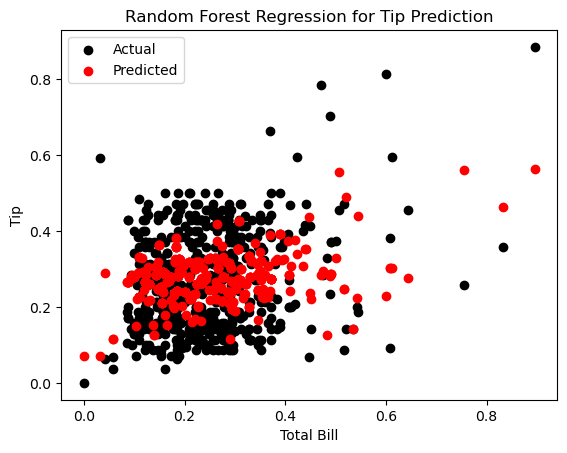

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_tip = df[['total_bill']].values
y_tip = df['tip'].values

X_train_tip, X_test_tip, y_train_tip, y_test_tip = train_test_split(X_tip, y_tip, test_size=0.25, random_state=0)

rf_tip = RandomForestRegressor(n_estimators=100, random_state=42)
rf_tip.fit(X_train_tip, y_train_tip)

y_pred_tip = rf_tip.predict(X_test_tip)
print('Mean Absolute Error:', mean_absolute_error(y_test_tip, y_pred_tip))
print('Mean Squared Error:', mean_squared_error(y_test_tip, y_pred_tip))
print('R2 Score:', r2_score(y_test_tip, y_pred_tip))

plt.scatter(X_test_tip, y_test_tip, color='black', label='Actual')
plt.scatter(X_test_tip, y_pred_tip, color='red', label='Predicted')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Random Forest Regression for Tip Prediction')
plt.legend()
plt.show()


##### ADA Boost

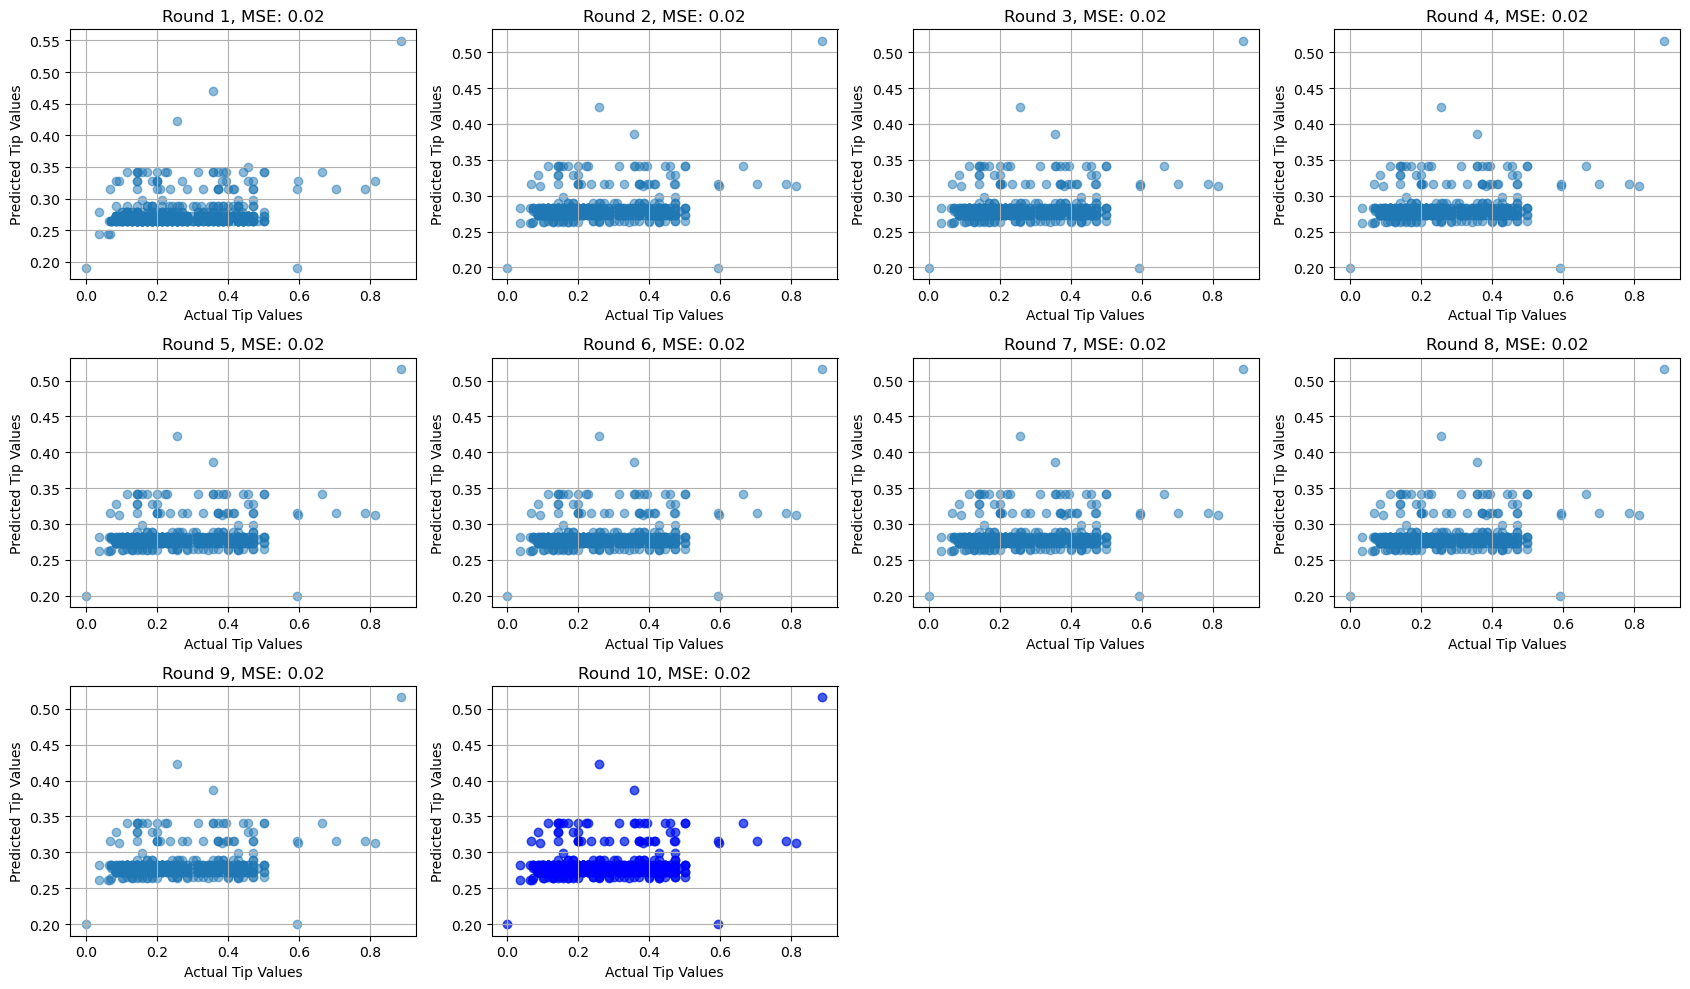

In [57]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

n_rounds = 10  
thresholds = np.linspace(100, 0, n_rounds) 
ada_models = []
ada_errors = []
ada_predictions = []

for i in range(n_rounds):
    ada_model = AdaBoostRegressor(n_estimators=(i + 1) * 10, random_state=42)
    ada_model.fit(X_train_tip, y_train_tip)
    ada_models.append(ada_model)
    ada_pred = ada_model.predict(X_test_tip)
    ada_predictions.append(ada_pred)
    ada_errors.append(mean_squared_error(y_test_tip, ada_pred))

plt.figure(figsize=(17, 10))
for i in range(n_rounds):
    plt.subplot(3, 4, i + 1)
    plt.scatter(y_test_tip, ada_predictions[i], alpha=0.5)
    plt.title(f"Round {i + 1}, MSE: {ada_errors[i]:.2f}")
    plt.xlabel('Actual Tip Values')
    plt.ylabel('Predicted Tip Values')
    plt.grid(True)
    threshold = thresholds[i]
    incorrect_mask = np.abs(y_test_tip - ada_predictions[i]) > threshold
    plt.scatter(y_test_tip[incorrect_mask], ada_predictions[i][incorrect_mask], color='blue', alpha=0.5)

plt.tight_layout()
plt.show()


In [58]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

gbm_model.fit(X_train, y_train)
gbm_predictions = gbm_model.predict(X_test)
gbm_predictions


array([-1.25419699, -1.25419699, -1.25419699, -1.25419699, -1.25419699,
       -1.25419699, -1.25419699, -1.25419699, -1.25419699, -1.25419699,
       -1.25419699, -1.25419699, -1.25419699, -1.25419699, -1.25419699,
       -1.25419699, -1.25419699, -1.25419699, -1.25419699, -1.25419699,
       -1.25419699, -1.25419699, -1.25419699, -1.25419699, -1.25419699,
       -1.25419699, -1.25419699, -1.25419699, -1.25419699, -1.25419699,
       -1.25419699, -1.25419699, -1.25419699, -1.25419699, -1.25419699,
       -1.25419699, -1.25419699, -1.25419699, -1.25419699, -1.25419699,
       -1.25419699, -1.25419699, -1.25419699, -1.25419699, -1.25419699,
       -1.25419699, -1.25419699, -1.25419699, -1.25419699, -1.25419699,
       -1.25419699, -1.25419699, -1.25419699, -1.25419699, -1.25419699,
       -1.25419699, -1.25419699, -1.25419699, -1.25419699, -1.25419699,
       -1.25419699, -1.25419699, -1.25419699, -1.25419699, -1.25419699,
       -1.25419699, -1.25419699, -1.25419699, -1.25419699, -1.25

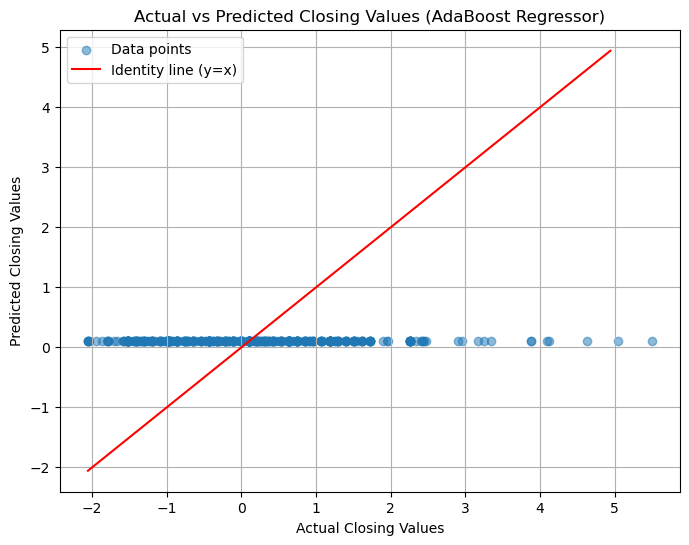

In [59]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, adaboost_predictions, alpha=0.5, label='Data points')
plt.plot(np.arange(min(y_test), max(y_test)), np.arange(min(y_test), max(y_test)), color='red', label='Identity line (y=x)')
plt.xlabel('Actual Closing Values')
plt.ylabel('Predicted Closing Values')
plt.title('Actual vs Predicted Closing Values (AdaBoost Regressor)')
plt.legend()
plt.grid(True)
plt.show()



In [60]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

base_model = DecisionTreeRegressor()
bagging_model = BaggingRegressor(base_estimator=base_model, n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)
bagging_predictions

array([-0.91999177, -0.91999177, -0.91999177, -0.91999177, -0.91999177,
       -0.91999177, -0.91999177, -0.91999177, -0.91999177, -0.91999177,
       -0.91999177, -0.91999177, -0.91999177, -0.91999177, -0.91999177,
       -0.91999177, -0.91999177, -0.91999177, -0.91999177, -0.91999177,
       -0.91999177, -0.91999177, -0.91999177, -0.91999177, -0.91999177,
       -0.91999177, -0.91999177, -0.91999177, -0.91999177, -0.91999177,
       -0.91999177, -0.91999177, -0.91999177, -0.91999177, -0.91999177,
       -0.91999177, -0.91999177, -0.91999177, -0.91999177, -0.91999177,
       -0.91999177, -0.91999177, -0.91999177, -0.91999177, -0.91999177,
       -0.91999177, -0.91999177, -0.91999177, -0.91999177, -0.91999177,
       -0.91999177, -0.91999177, -0.91999177, -0.91999177, -0.91999177,
       -0.91999177, -0.91999177, -0.91999177, -0.91999177, -0.91999177,
       -0.91999177, -0.91999177, -0.91999177, -0.91999177, -0.91999177,
       -0.91999177, -0.91999177, -0.91999177, -0.91999177, -0.91

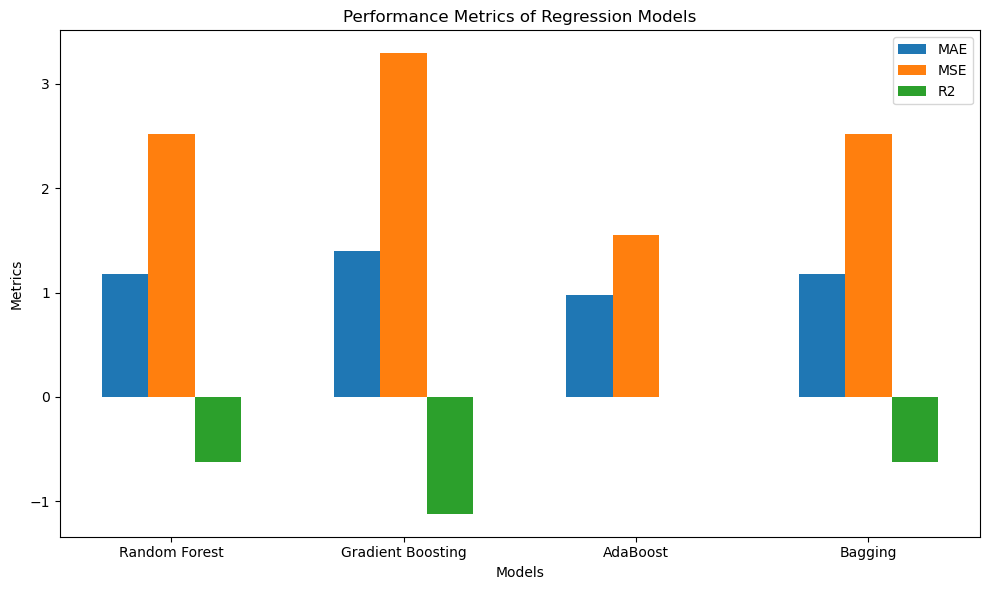

Best MAE: 0.9785953375031191 by AdaBoost
Best MSE: 1.5550268222730521 by AdaBoost
Best R2 : -0.000719076187158274 by AdaBoost


In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import cross_val_predict

models = [
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('AdaBoost', AdaBoostRegressor(n_estimators=100, random_state=42)),
    ('Bagging', BaggingRegressor(n_estimators=100, random_state=42)),
]


mae_list, mse_list, r2_list = [], [], []

for name, model in models:
    model.fit(X_train, y_train) 
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)

models_names = [name for name, _ in models]

x = np.arange(len(models_names))

plt.figure(figsize=(10, 6))

plt.bar(x - 0.2, mae_list, 0.2, label='MAE')
plt.bar(x, mse_list, 0.2, label='MSE')
plt.bar(x + 0.2, r2_list, 0.2, label='R2')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Performance Metrics of Regression Models')
plt.xticks(x, models_names)
plt.legend()
plt.tight_layout()
plt.show()

best_mae = min(mae_list)
best_mse = min(mse_list)
best_r2 = max(r2_list)

best_mae_model = models_names[mae_list.index(best_mae)]
best_mse_model = models_names[mse_list.index(best_mse)]
best_r2_model = models_names[r2_list.index(best_r2)]

print(f"Best MAE: {best_mae} by {best_mae_model}")
print(f"Best MSE: {best_mse} by {best_mse_model}")
print(f"Best R2 : {best_r2} by {best_r2_model}")



In [63]:
for name, model in models:
    print(f"Model: {name}")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R2: {r2:.4f}")
    print("-" * 20)


Model: Random Forest
MAE: 1.1758
MSE: 2.5237
R2: -0.6241
--------------------
Model: Gradient Boosting
MAE: 1.3951
MSE: 3.2936
R2: -1.1196
--------------------
Model: AdaBoost
MAE: 0.9786
MSE: 1.5550
R2: -0.0007
--------------------
Model: Bagging
MAE: 1.1758
MSE: 2.5237
R2: -0.6241
--------------------


In [64]:
best_mae = min(mae_list)
best_mse = min(mse_list)
best_r2 = max(r2_list)

best_mae_model = models_names[mae_list.index(best_mae)]
best_mse_model = models_names[mse_list.index(best_mse)]
best_r2_model = models_names[r2_list.index(best_r2)]

print(f"Best MAE: {best_mae} by {best_mae_model}")
print(f"Best MSE: {best_mse} by {best_mse_model}")
print(f"Best R2 : {best_r2} by {best_r2_model}")


Best MAE: 0.9785953375031191 by AdaBoost
Best MSE: 1.5550268222730521 by AdaBoost
Best R2 : -0.000719076187158274 by AdaBoost


In [65]:
%%capture
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



In [66]:
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

Best Hyperparameters: {'max_depth': 5, 'n_estimators': 300}
Best Model: RandomForestRegressor(max_depth=5, n_estimators=300, random_state=42)
